In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import sys
import os
import pandas as pd
import itertools

# Adicionar diretório src ao path
project_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_path)

from src.ga_runner import run_ga
from src.individual import create_individual
from src.fitness import evaluate_fitness
from src.selection import roulette_selection, ranking_selection, tournament_selection
from src.crossover import group_based_crossover, greedy_table_merge_crossover
from src.mutation import swap_mutation, one_point_mutation, multiple_point_mutation
from copy import deepcopy

In [2]:
selection_types = ["tournament"]
crossover_types = ["group"]
mutation_types = ["swap"]
elitism_options = [True, False]

results = []

for sel, cross, mut, elit in itertools.product(selection_types, crossover_types, mutation_types, elitism_options):
    print(f"Running: {sel} - {cross} - {mut} - elitism={elit}")
    best_solution, best_score, best_fitness_per_gen = run_ga(
        pop_size=30,
        generations=30,
        elite_size=2,
        use_elitism=elit,
        selection_type=sel,
        crossover_type=cross,
        mutation_type=mut,
        mutation_prob=0.2,
        seed=42,
        verbose=False
    )
    results.append({
        "selection": sel,
        "crossover": cross,
        "mutation": mut,
        "elitism": elit,
        "history": best_fitness_per_gen,
        "final_score": best_score
    })

Running: tournament - group - swap - elitism=True
Running: tournament - group - swap - elitism=False


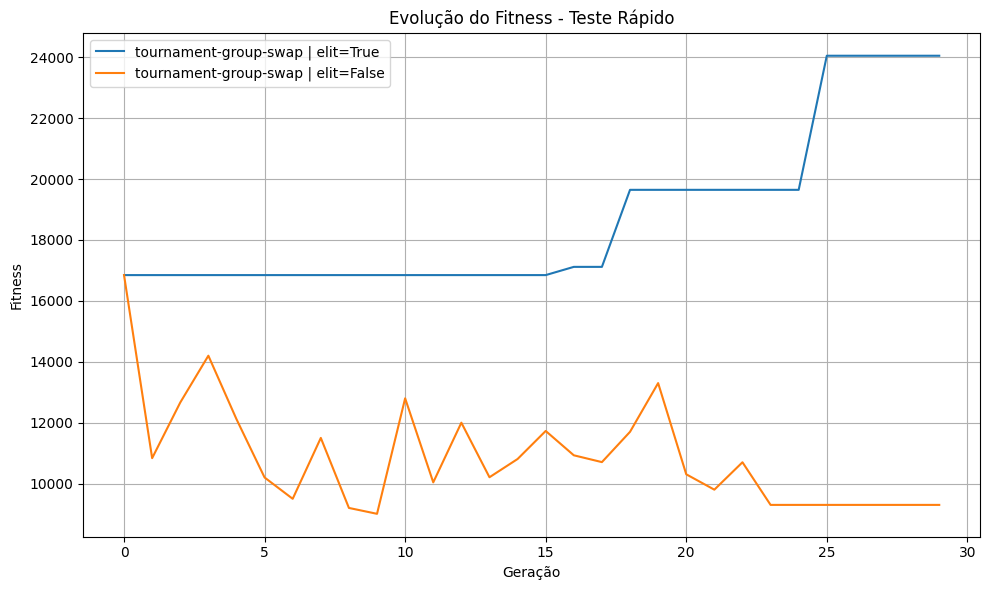

In [3]:
plt.figure(figsize=(10, 6))
for r in results:
    label = f"{r['selection']}-{r['crossover']}-{r['mutation']} | elit={r['elitism']}"
    plt.plot(r["history"], label=label)
plt.xlabel("Geração")
plt.ylabel("Fitness")
plt.title("Evolução do Fitness - Teste Rápido")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
summary = pd.DataFrame([{
    "selection": r["selection"],
    "crossover": r["crossover"],
    "mutation": r["mutation"],
    "elitism": r["elitism"],
    "final_score": r["final_score"]
} for r in results])

summary.sort_values(by="final_score", ascending=False).reset_index(drop=True)


,selection,crossover,mutation,elitism,final_score
0,tournament,group,swap,True,24051
1,tournament,group,swap,False,9300
